# predicting model of slaking settlement¶
## import and definition

In [616]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
import math 
import numpy.polynomial.polynomial as poly
from scipy.interpolate import interp1d
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib.patches as mpatches
import random
import matplotlib.gridspec as gridspec
class AnyObject(object):
    pass


class data_handler(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        scale = fontsize /10
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch_circle1 = mpatches.Circle([x0+height/5, y0 + height/5 ], height * 0.25*scale, facecolor='g',
                edgecolor='g', transform=handlebox.get_transform())
        patch_circle2 = mpatches.Circle([x0 + height*2, y0 + height/5], height * 0.25*scale, facecolor='b',
                edgecolor='b', transform=handlebox.get_transform())
        patch_circle3 = mpatches.Circle([x0 +  height*4, y0 + height/5], height *0.25* scale, facecolor='r',
                edgecolor='r', transform=handlebox.get_transform())
        handlebox.add_artist(patch_circle1)
        handlebox.add_artist(patch_circle2)
        handlebox.add_artist(patch_circle3)
        return patch_circle1
class AnyObject1(object):
    pass


class data_handler1(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        scale = fontsize /12
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch_circle1 = mpatches.Polygon(([x0+height/5-height * 0.5*scale, y0 + height/5 ],[x0+height/5+height * 0.5*scale, y0 + height/5 ],[x0+height/5, y0 + height/5+height*0.8] ), fc='green', transform=handlebox.get_transform())
        patch_circle2 = mpatches.Polygon(([x0 + height*2-height * 0.5*scale, y0 + height/5 ],[x0 + height*2+height * 0.5*scale, y0 + height/5 ],[x0 + height*2, y0 + height/5+height*0.8] ), fc='b', transform=handlebox.get_transform())
        patch_circle3 = mpatches.Polygon(([x0 +  height*4-height * 0.5*scale, y0 + height/5  ],[x0 +  height*4+height * 0.5*scale, y0 + height/5 ],[x0 +  height*4, y0 + height/5+height*0.8] ), fc='r', transform=handlebox.get_transform())
        handlebox.add_artist(patch_circle1)
        handlebox.add_artist(patch_circle2)
        handlebox.add_artist(patch_circle3)
        return 
    
class AnyObject2(object):
    pass


class data_handler2(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        scale = fontsize /18
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch_circle1 = mpatches.Polygon(([x0+height/5-height * 0.5*scale, y0 + height/5 ],[x0+height/5, y0 + height/5+height*0.4],[x0+height/5+height * 0.5*scale, y0 + height/5],[x0+height/5, y0 + height/5-height*0.4] ), fc='green', transform=handlebox.get_transform())
        patch_circle2 = mpatches.Polygon(([x0 + height*2-height * 0.5*scale, y0 + height/5 ],[x0 + height*2, y0 + height/5+height*0.4],[x0 + height*2+height * 0.5*scale, y0 + height/5],[x0 + height*2, y0 + height/5-height*0.4] ), fc='b', transform=handlebox.get_transform())
        patch_circle3 = mpatches.Polygon(([x0 +  height*4-height * 0.5*scale, y0 + height/5 ],[x0 +  height*4, y0 + height/5+height*0.4],[x0 +  height*4+height * 0.5*scale, y0 + height/5],[x0 +  height*4, y0 + height/5-height * 0.4] ), fc='r', transform=handlebox.get_transform())
        handlebox.add_artist(patch_circle1)
        handlebox.add_artist(patch_circle2)
        handlebox.add_artist(patch_circle3)
        return patch_circle1

class AnyObject3(object):
    pass


class data_handler3(object):
    def legend_artist(self, legend, orig_handle, fontsize, handlebox):
        scale = fontsize /18
        x0, y0 = handlebox.xdescent, handlebox.ydescent
        width, height = handlebox.width, handlebox.height
        patch_circle1 = mpatches.Polygon(([x0+height/5-height * 0.5*scale, y0 + height/5 ],[x0+height/5-height * 0.5*scale, y0 + height/5+height*scale],[x0+height/5+height * 0.5*scale, y0 + height/5+height*scale],[x0+height/5+height * 0.5*scale, y0 + height/5] ), fc='g', transform=handlebox.get_transform())
        patch_circle2 = mpatches.Polygon(([x0 + height*2-height * 0.5*scale, y0 + height/5 ],[x0 + height*2-height * 0.5*scale, y0 + height/5+height*scale],[x0 + height*2+height * 0.5*scale, y0 + height/5+height*scale],[x0 + height*2+height * 0.5*scale, y0 + height/5] ), fc='g', transform=handlebox.get_transform())
        patch_circle3 = mpatches.Polygon(([x0 +  height*4-height * 0.5*scale, y0 + height/5 ],[x0 +  height*4-height * 0.5*scale, y0 + height/5+height*scale],[x0 +  height*4+height * 0.5*scale, y0 + height/5+height*scale],[x0 +  height*4+height * 0.5*scale, y0 + height/5] ), fc='r', transform=handlebox.get_transform())
        handlebox.add_artist(patch_circle1)
        handlebox.add_artist(patch_circle2)
        handlebox.add_artist(patch_circle3)
        return patch_circle1   
    
    
    
    
    # calculating the brekage 
def relative_br (seive_size, percentage_passing):

    seive_log=np.log10(np.array(seive_size))
    seive_dis=np.array(seive_log)[:-1]-np.array(seive_log)[1:]
    per_dis_100_1cy=(np.array(percentage_passing)[:-1]+np.array(percentage_passing)[1:])/2
    total_100_1cy=((seive_dis)*per_dis_100_1cy).sum()
    seive_dis_init=(np.log10(np.array(seive_size)[0])-np.log10(np.array(seive_size)[1]))*50
    area_inbetween=total_100_1cy-seive_dis_init
    possible_total=(np.log10(np.array(seive_size)[0])-np.log10(np.array(seive_size)[-1]))*100-seive_dis_init
    Br=(area_inbetween/possible_total)
    return (Br)
# calculating the particle size with givein percentage
def parti_size (sei, pass_per, wan_per):
    return(np.interp(wan_per,list(reversed(list(pass_per))),list(reversed(list(sei)))))
def get_sub(x):
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s))
    return x.translate(res)

# Data and its manipulation

In [556]:
df1= pd. read_excel (r"C:\Users\ThinkCentre-M73\Desktop\master 2\master research1.xlsx")#read the settlement related file
df2= pd. read_excel (r"C:\Users\ThinkCentre-M73\Desktop\master 2\python link file\breakage.xlsx")#read the breakage related file
df1.dropna(subset = ["100 kpa"], inplace=True)
df3= pd. read_excel (r"C:\Users\ThinkCentre-M73\Desktop\master 2\python link file\3 compaction strain.xlsx")# 3 compaction mudstone

# add columen for dry density (no suffi)
df1["Dry Density 100 kpa"]=1250*(100)/(100-df1["100 kpa"]-1)
df1["Dry Density 200 kpa"]=1250*(100)/(100-df1["200 kpa"]-2.2)
df1["Dry Density 500 kpa"]=1250*(100)/(100-df1["500 kpa"]-4)

# add columen for voids (no suffi)
df1["e-100 kpa"]=(1-(df1["Dry Density 100 kpa"]/2690))/(df1["Dry Density 100 kpa"]/2690)
df1["e-200 kpa"]=(1-(df1["Dry Density 200 kpa"]/2690))/(df1["Dry Density 200 kpa"]/2690)
df1["e-500 kpa"]=(1-(df1["Dry Density 500 kpa"]/2690))/(df1["Dry Density 500 kpa"]/2690)
# add columen for voids (suffi)

df1['e-100 kpa'][0]=1.14229
df1['e-200 kpa'][0]=1.105
df1['e-500 kpa'][0]=1.02
# add columen for relative compaction 
df1['dc-100']=df1['Dry Density 100 kpa']/1650*100
df1['dc-200']=df1['Dry Density 200 kpa']/1650*100
df1['dc-500']=df1['Dry Density 500 kpa']/1650*100
# compaction
Dry_Density_82=1362*(100)/(100-(df3["s-82%"][::2])-1.1)
Dry_Density_87 =1394*(100)/(100-(df3["s-87%"][::2]))
e_82=(1-(Dry_Density_82/2690))/(Dry_Density_82/2690)
e_87=(1-(Dry_Density_87/2690))/(Dry_Density_87/2690)

In [557]:
(200**0.4*(e_87[0]-0.717)**0.8)

2.413369839753807

In [558]:
# strain_prediction_cy_82=np.array(5.6*(np.ones(len(e_82[1:-1]))*200)**0.1*(e_82[1:-1]-0.717)**0.8)
strain_prediction_cy_87=np.array(5.6*(np.ones(len(e_87[1:-1]))*200)**0.1*(e_87[1:-1]-0.717)**0.8)
s_87=np.insert(strain_prediction_cy_87,0,0)
# strain_prediction_cy_87=np.array(5.6*(np.ones(len(e_87[1:-1]))*200)**0.1*(e_87[1:-1]-0.717)**0.8)
# strain_prediction_cy_87,df3["s-82%"][::2]
s_87_1=s_87+(200**0.4*(e_87[0]-0.717)**0.8)
s_87_1,df1["no of cycle"][:7:2]

(array([2.41336984, 4.55194826, 4.44463588]),
 0    0.0
 2    1.0
 4    2.0
 6    3.0
 Name: no of cycle, dtype: float64)

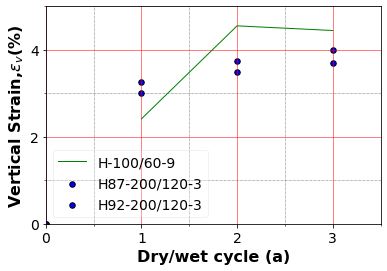

In [559]:
fig7,(ax1)=plt.subplots()


ax1.plot(df1["no of cycle"][:7:2][1:], s_87_1, color='g', marker="o", linestyle='-',linewidth=1, markersize=0, label='H-100/60-9')
 
ax1.scatter(df3["no of cycle"][::2], df3["s-87%"][::2],s=30,edgecolor='black', facecolor=['b'],label="H87-200/120-3" )  
ax1.scatter(df3["no of cycle"][::2], df3["s-82%"][::2],s=30,edgecolor='black', facecolor=['b'],label="H92-200/120-3" ) 
# ax1.scatter(df1["no of cycle"][::2], df1["500 kpa"][::2],s=30,edgecolor='black', facecolor=['w'] ) 
# ax1.scatter(df1["no of cycle"][::2], df1["hattian"][::2],s=30,edgecolor='black', facecolor=['w'] )  
# ax1.scatter(df1["no of cycle"][::2], df1["gravel"][::2],s=30,edgecolor='black', facecolor=['w'] )
ax1.set_ylim(0,5)
ax1.set_xlim(0,3.5)
ax1.xaxis.set_major_locator(MultipleLocator(1))
ax1.xaxis.set_minor_locator(MultipleLocator(0.5))
ax1.yaxis.set_major_locator(MultipleLocator(2))
ax1.yaxis.set_minor_locator(MultipleLocator(1))
ax1.legend(loc='lower left',framealpha=0.25, fontsize=14,ncol=1)
ax1.set_ylabel('Vertical Strain,$\epsilon_{v}$(%)',fontweight='bold',fontsize=16)
ax1.set_xlabel('Dry/wet cycle (a)',fontweight='bold',fontsize=16)
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


## rearranging the data only for dry

In [13]:
#only dry and not for first wetting 
#100
t0_100=np.array(df1['e-100 kpa'][::2])#e
t1_100=t0_100-np.ones(len(t0_100))*t0_100[-1]#differnce from nc line
e_cum_100=np.cumsum(t1_100)# cumulative differnce from nc line
s_cum_100=np.array(df1["100 kpa"][::2])# cumulative dry strain
s1_100=-(s_cum_100[:-1]-s_cum_100[1:])[:]
#200
t0_200=np.array(df1['e-200 kpa'][::2])#e
t1_200=t0_200-np.ones(len(t0_200))*t0_200[-1]#differnce from nc line
e_cum_200=np.cumsum(t1_200)# cumulative differnce from nc line
s_cum_200=np.array(df1["200 kpa"][::2])# cumulative dry strain
s1_200=-(s_cum_200[:-1]-s_cum_200[1:])[:]
#500
t0_500=np.array(df1['e-500 kpa'][::2])#e
t1_500=t0_500-np.ones(len(t0_500))*t0_500[-1]#differnce from nc line
e_cum_500=np.cumsum(t1_500)# cumulative differnce from nc line
s_cum_500=np.array(df1["500 kpa"][::2])# cumulative dry strain
s1_500=-(s_cum_500[:-1]-s_cum_500[1:])[:]

In [14]:
df1["100 kpa"]

0      0.000
1      5.000
2      8.000
3      8.500
4     10.250
5     10.250
6     11.500
7     11.500
8     12.300
9     12.350
10    12.900
11    12.950
12    13.300
13    13.350
14    13.450
15    13.650
16    13.500
17    13.625
18    13.530
19    13.627
Name: 100 kpa, dtype: float64

In [23]:
np.linspace(0, 9,19)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. ])

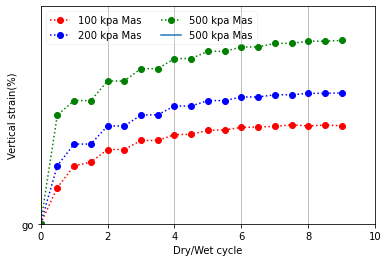

In [24]:
plt.figure()

plt.plot(np.linspace(0, 9,19),df1["100 kpa"][:-1],'o:r',label='100 kpa Mas')
plt.plot(np.linspace(0,9,19),df1["200 kpa"][:-1],'o:b',label='200 kpa Mas')
plt.plot(np.linspace(0, 9,19),df1["500 kpa"][:-1],'o:g','go',label='500 kpa Mas')

plt.xlabel('Dry/Wet cycle')
plt.ylabel('Vertical strain(%)')
plt.legend(loc='best',framealpha=0.25,ncol=2)
plt.xlim(0,10)
plt.ylim(0,30)
plt.grid(True)
plt.show()


In [560]:
# breakage of 3 points
Br_100=[0.01,relative_br(df2['seive'],df2['100-1cy']),relative_br(df2['seive'],df2['100-5cy']),relative_br(df2['seive'],df2['100-9cy'])]
Br_200=[0.025,relative_br(df2['seive'],df2['200-1cy']),relative_br(df2['seive'],df2['200-5cy']),relative_br(df2['seive'],df2['200-9cy'])]
Br_500=[0.05,relative_br(df2['seive'],df2['500-1cy']),relative_br(df2['seive'],df2['500-5cy']),relative_br(df2['seive'],df2['500-9cy'])]
# strain of those point
strain_100=[0,(df1.loc[df1['no of cycle']==1, '100 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==5, '100 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==9, '100 kpa'].iloc[0])]
strain_200=[0,(df1.loc[df1['no of cycle']==1, '200 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==5, '200 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==9, '200 kpa'].iloc[0])]
strain_500=[0,(df1.loc[df1['no of cycle']==1, '500 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==5, '500 kpa'].iloc[0]),(df1.loc[df1['no of cycle']==9, '500 kpa'].iloc[0])]
strain_100_load=np.array(strain_100)+1
strain_200_load=np.array(strain_200)+2.2
strain_500_load=np.array(strain_500)+4
# cumulative e
e_cum_100_159=[e_cum_100[1],e_cum_100[5],e_cum_100[9]]
e_cum_200_159=[e_cum_200[1],e_cum_200[5],e_cum_200[9]]
e_cum_500_159=[e_cum_500[1],e_cum_500[5],e_cum_500[9]]

In [390]:
strain_100_load

array([ 1.  ,  9.  , 13.9 , 14.53])

In [391]:
np.insert(e_cum_100[1:]-e_cum_100[:-1],0,e_cum_100[0])

array([0.3029756, 0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576,
       0.0049496, 0.0017216, 0.0006456, 0.       ])

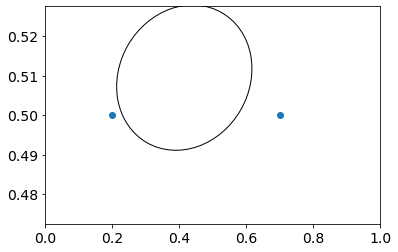

In [529]:
import matplotlib.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
xdata, ydata = (0.2, 0.7), (0.5, 0.5)
ax.plot(xdata, ydata, "o")
ax.set_xlim((0, 1))

trans = (fig.dpi_scale_trans +
         transforms.ScaledTranslation(xdata[0], ydata[0], ax.transData))

# plot an ellipse around the point that is 150 x 130 points in diameter...
circle = mpatches.Ellipse((1, 0.52), 150/72, 130/72, angle=60,
                          fill=None, transform=trans)
ax.add_patch(circle)
plt.show()

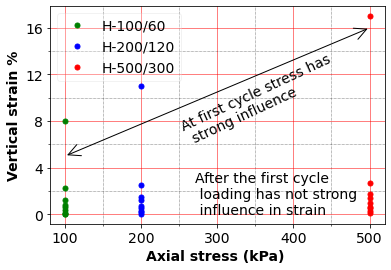

In [530]:
fig7,(ax5e)=plt.subplots()
ax5e.plot(np.ones(9)*100,s_cum_100[1:]-s_cum_100[:-1], color='green', marker="o", linestyle='-',linewidth=0, markersize=5, label='H-100/60')
ax5e.plot(np.ones(9)*200,s_cum_200[1:]-s_cum_200[:-1],color='b', marker="o", linestyle='-',linewidth=0, markersize=5, label='H-200/120')
ax5e.plot(np.ones(9)*500,s_cum_500[1:]-s_cum_500[:-1], color='r', marker="o", linestyle='-',linewidth=0, markersize=5, label='H-500/300')
ax5e.legend(loc='upper left',framealpha=0.25,ncol=1)
ax5e.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax5e.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5e.set_ylabel('Vertical strain %',fontweight='bold')
ax5e.set_xlabel('Axial stress (kPa) ',fontweight='bold')
ax5e.xaxis.set_major_locator(MultipleLocator(100))
ax5e.xaxis.set_minor_locator(MultipleLocator(50))
# plt.xlim(0.12, 0)
ax5e.yaxis.set_major_locator(MultipleLocator(4))
ax5e.yaxis.set_minor_locator(MultipleLocator(2))
ax5e.text(250,6, 'At first cycle stress has\n strong influence ',  rotation=25)
ax5e.text(270, 0, 'After the first cycle \n loading has not strong \n influence in strain ',  rotation=0)
ax5e.annotate('', xy=(100,5), xytext=(500,16),size=30 , arrowprops=dict(arrowstyle='<->'))

plt.show()

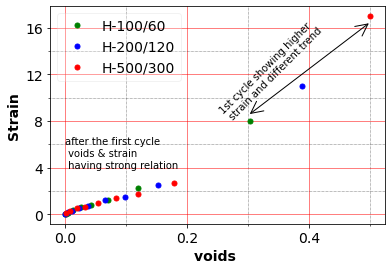

In [541]:

from matplotlib.patches import Ellipse
import matplotlib as mpl
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})


fig6,(ax5e)=plt.subplots()
ax5e.plot(np.insert(e_cum_100[1:]-e_cum_100[:-1],0,e_cum_100[0])[:-1],s_cum_100[1:]-s_cum_100[:-1], color='green', marker="o", linestyle='-',linewidth=0, markersize=5, label='H-100/60')
ax5e.plot(np.insert(e_cum_200[1:]-e_cum_200[:-1],0,e_cum_200[0])[:-1],s_cum_200[1:]-s_cum_200[:-1],color='b', marker="o", linestyle='-',linewidth=0, markersize=5, label='H-200/120')
ax5e.plot(np.insert(e_cum_500[1:]-e_cum_500[:-1],0,e_cum_500[0])[:-1],s_cum_500[1:]-s_cum_500[:-1], color='r', marker="o", linestyle='-',linewidth=0, markersize=5, label='H-500/300')
ax5e.legend(loc='upper left',framealpha=0.25)
ax5e.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax5e.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5e.set_ylabel('Strain',fontweight='bold')
ax5e.set_xlabel('voids ',fontweight='bold')
ax5e.xaxis.set_major_locator(MultipleLocator(0.2))
ax5e.xaxis.set_minor_locator(MultipleLocator(0.1))
# plt.xlim(0.12, 0)

ax5e.yaxis.set_major_locator(MultipleLocator(4))
ax5e.yaxis.set_minor_locator(MultipleLocator(2))
ax5e.text(0.25, 8, '1st cycle showing higher\n strain and different trend ',  rotation=45,fontsize=10)
ax5e.annotate('', xy=(0.3,8.5), xytext=(0.5,16.5),size=30 , arrowprops=dict(arrowstyle='<->'))
ax5e.text(0.0, 4, 'after the first cycle \n voids & strain \n having strong relation',  rotation=0, fontsize=10)
plt.show()



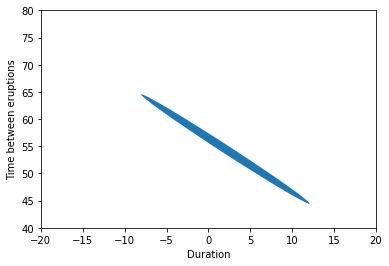

In [394]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
a
meanX = 2.0374
meanY = 54.4897
secondLongest = 0.0700
longest = 33.7679

ax = plt.subplot(111)
plt.axis([-20, 20, 40, 80])
#plt.plot(duration, waitperiod, "rx")
plt.xlabel("Duration")
plt.ylabel("Time between eruptions")

#if rotation is set to 0, it works perfectly fine but I want a different angle
ellipse = Ellipse((meanX, meanY), 2*np.sqrt(5.991*secondLongest), 2*np.sqrt(5.991*longest), 45)

ax.add_artist(ellipse)

plt.show()

In [395]:
def objective1(x, a, b):
	return (math.e^(a*x)+b) 
# fig6.tight_layout()
e_cum=np.concatenate([np.insert(e_cum_100[1:]-e_cum_100[:-1],0,e_cum_100[0])[:-1],np.insert(e_cum_200[1:]-e_cum_200[:-1],0,e_cum_200[0])[:-1],np.insert(e_cum_500[1:]-e_cum_500[:-1],0,e_cum_500[0])[:-1]])
s_cum=np.concatenate([s_cum_100[1:]-s_cum_100[:-1],s_cum_200[1:]-s_cum_200[:-1],s_cum_500[1:]-s_cum_500[:-1]])
popt4,_ = np.polyfit(np.log(e_cum),e_cum, s_cum)
a4, b4 = popt4
min_x4, max_x4 = min(e_cum), max(e_cum)  
new_x4 = np.linspace(min_x4,max_x4,10)
new_y4=objective(new_x4, a4, b4)

TypeError: only size-1 arrays can be converted to Python scalars

In [411]:
new_x2,new_y2

(array([0.025     , 0.07676112, 0.12852225, 0.18028337, 0.2320445 ,
        0.28380562, 0.33556675, 0.38732787, 0.43908899, 0.49085012]),
 array([ 1.94378502,  5.656481  ,  8.94866924, 11.82034974, 14.27152251,
        16.30218755, 17.91234484, 19.10199441, 19.87113623, 20.21977033]))

In [578]:
Br_500,strain_100_load


([0.05, 0.23275230310919545, 0.3180162958212388, 0.4223131554513681],
 array([ 1.  ,  9.  , 13.9 , 14.53]))

No handles with labels found to put in legend.


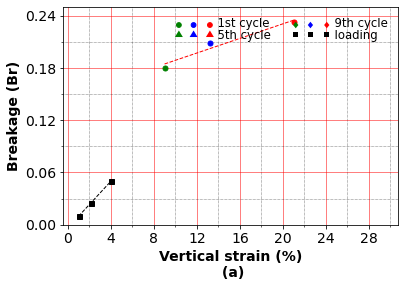

<Figure size 864x576 with 0 Axes>

In [579]:
import itertools
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

fig6,(ax5d)=plt.subplots()
fig6=plt.figure(figsize=(12,8))

# breakage of particle 

ax5d.plot(strain_100_load[1],Br_100[1],color='g', marker='o', linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_200_load[1],Br_200[1],color='b', marker='o', linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_500_load[1],Br_500[1],color='r', marker='o', linestyle='-',linewidth=0, markersize=5)

ax5d.plot(strain_100_load[0],Br_100[0],color='black', marker="s", linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_200_load[0],Br_200[0],color='black', marker="s", linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_500_load[0],Br_500[0],color='black', marker="s", linestyle='-',linewidth=0, markersize=5)

ax5d.plot(strain_100_load[2],Br_100[2],color='g', marker="^", linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_200_load[2],Br_200[2],color='b', marker="^", linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_500_load[2],Br_500[2],color='r', marker="^", linestyle='-',linewidth=0, markersize=5)

ax5d.plot(strain_100_load[3],Br_100[3],color='g', marker="D", linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_200_load[3],Br_200[3],color='b', marker="D", linestyle='-',linewidth=0, markersize=5)
ax5d.plot(strain_500_load[3],Br_500[3],color='r', marker="D", linestyle='-',linewidth=0, markersize=5)



from scipy.optimize import curve_fit

def objective_line(x, a, b):
	return (a * x) + (b ) 
# curve fitting 100
popt3,_ = curve_fit(objective_line,[strain_100_load[0],strain_200_load[0],strain_500_load[0]],[Br_100[0],Br_200[0],Br_500[0]])
a3, b3 = popt3
min_x3, max_x3 = min(strain_100_load[0],strain_200_load[0],strain_500_load[0]), max(strain_100_load[0],strain_200_load[0],strain_500_load[0])  
new_x3 = np.linspace(min_x3,max_x3,10)
new_y3=objective_line(new_x3, a3, b3)
ax5d.plot(new_x3,new_y3,color='black', marker='o', linestyle='--',linewidth=1, markersize=0)

popt4,_ = curve_fit(objective_line,[strain_100_load[1],strain_200_load[1],strain_500_load[1]],[Br_100[1],Br_200[1],Br_500[1]])
a4, b4 = popt4
min_x4, max_x4 = min(strain_100_load[1],strain_200_load[1],strain_500_load[1]), max(strain_100_load[1],strain_200_load[1],strain_500_load[1])  
new_x4 = np.linspace(min_x4,max_x4,10)
new_y4=objective_line(new_x4, a4, b4)
ax5d.plot(new_x4,new_y4,color='r', marker='o', linestyle='--',linewidth=1, markersize=0)

ax5d.legend(loc='lower right',framealpha=0.25)
ax5d.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax5d.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5d.set_ylabel('Breakage (Br)',fontweight='bold')
ax5d.set_xlabel('Vertical strain (%)\n (a)',fontweight='bold')
ax5d.set_ylim(0.0,0.25)
ax5d.legend([AnyObject(),AnyObject1(),AnyObject2(),AnyObject3()], ['  1st cycle', '  5th cycle', '  9th cycle','  loading'], handler_map={AnyObject: data_handler(),AnyObject1: data_handler1(),AnyObject2: data_handler2(),AnyObject3: data_handler3()}, ncol=2, fontsize='small',framealpha=0,loc='upper right',labelspacing=0)
ax5d.xaxis.set_major_locator(MultipleLocator(4))
ax5d.xaxis.set_minor_locator(MultipleLocator(2))
ax5d.yaxis.set_major_locator(MultipleLocator(0.06))
ax5d.yaxis.set_minor_locator(MultipleLocator(0.03))
# plt.savefig('br vs strain.png', dpi=300, bbox_inches='tight')




In [593]:
strain_100_load[0],Br_100[0]

(1.0, 0.01)

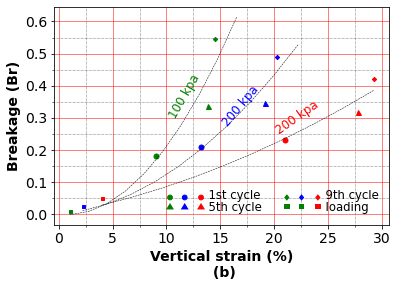

<Figure size 720x576 with 0 Axes>

In [619]:
plt.rcParams.update({'font.size': 14})

fig6,(ax5c)=plt.subplots()

fig6=plt.figure(figsize=(10,8))
from scipy.optimize import curve_fit
def objective(x, a, b):
	return (a * x**2) + (b * x) 
ax5c.plot(strain_100_load[1],Br_100[1],color='g', marker='o', linestyle='-',linewidth=0, markersize=5)
ax5c.plot(strain_200_load[1],Br_200[1],color='b', marker='o', linestyle='-',linewidth=0, markersize=5)
ax5c.plot(strain_500_load[1],Br_500[1],color='r', marker='o', linestyle='-',linewidth=0, markersize=5)

ax5c.plot(strain_100_load[0],Br_100[0],color='g', marker="s", linestyle='-',linewidth=0, markersize=3)
ax5c.plot(strain_200_load[0],Br_200[0],color='b', marker="s", linestyle='-',linewidth=0, markersize=3)
ax5c.plot(strain_500_load[0],Br_500[0],color='r', marker="s", linestyle='-',linewidth=0, markersize=3)

ax5c.plot(strain_100_load[2],Br_100[2],color='g', marker="^", linestyle='-',linewidth=0, markersize=5)
ax5c.plot(strain_200_load[2],Br_200[2],color='b', marker="^", linestyle='-',linewidth=0, markersize=5)
ax5c.plot(strain_500_load[2],Br_500[2],color='r', marker="^", linestyle='-',linewidth=0, markersize=5)

ax5c.plot(strain_100_load[3],Br_100[3],color='g', marker="D", linestyle='-',linewidth=0, markersize=3)
ax5c.plot(strain_200_load[3],Br_200[3],color='b', marker="D", linestyle='-',linewidth=0, markersize=3)
ax5c.plot(strain_500_load[3],Br_500[3],color='r', marker="D", linestyle='-',linewidth=0, markersize=3)
 

# curve fitting 100
popt1,_ = curve_fit(objective, strain_100_load,Br_100)
a1, b1 = popt1
min_x1, max_x1 = min(strain_100_load), max(strain_100_load)  
new_x1 = np.linspace(min_x1,max_x1+2,10)
new_y1=objective(new_x1, a1, b1)
ax5c.plot(new_x1,new_y1,color='black', marker='o', linestyle='--',linewidth=0.5, markersize=0)
# curve fitting 200
popt2,_ = curve_fit(objective, strain_200_load,Br_200,)
a2, b2 = popt2
min_x2, max_x2 = min(strain_200_load), max(strain_200_load)  
new_x2 = np.linspace(min_x2,max_x2+2,10)
new_y2=objective(new_x2, a2, b2)
ax5c.plot(new_x2,new_y2,color='black', marker='o', linestyle='--',linewidth=0.5, markersize=0)
# curve fitting 500
popt4,_ = curve_fit(objective, strain_500_load ,Br_500)
a4, b4 = popt4
min_x4, max_x4 = min(strain_500_load), max(strain_500_load)  
new_x4 = np.linspace(min_x4,max_x4,10)
new_y4=objective(new_x4, a4, b4)
ax5c.plot(new_x4,new_y4,color='black', marker='o', linestyle='--',linewidth=0.5, markersize=0)
ax5c.legend([AnyObject(),AnyObject1(),AnyObject2(),AnyObject3()], ['  1st cycle', '  5th cycle', '  9th cycle','  loading'], handler_map={AnyObject: data_handler(),AnyObject1: data_handler1(),AnyObject2: data_handler2(),AnyObject3: data_handler3()}, ncol=2, fontsize='small',framealpha=0,loc='lower right',labelspacing=0)
ax5c.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax5c.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
ax5c.set_ylabel('Breakage (Br)',fontweight='bold')
ax5c.set_xlabel('Vertical strain (%)\n (b)',fontweight='bold')
# ax5c.set_ylim(0,30)

ax5c.xaxis.set_major_locator(MultipleLocator(5))
ax5c.xaxis.set_minor_locator(MultipleLocator(2.5))
ax5c.yaxis.set_major_locator(MultipleLocator(0.1))
ax5c.yaxis.set_minor_locator(MultipleLocator(0.05))
# plt.savefig('br vs strain.png', dpi=300, bbox_inches='tight')
ax5c.text(10, 0.3, '100 kpa',color="green",  rotation=60,fontsize=12)
ax5c.text(15, 0.275, '200 kpa',color="b",  rotation=50,fontsize=12)
ax5c.text(20, 0.25, '500 kpa',color="r",  rotation=35,fontsize=12)

fig6.tight_layout()


plt.savefig('line_plot', dpi=300)
plt.show()



# relative voids from NC line

In [101]:
a3,b3

(-111.4681783654688, 118.10754229630467)

In [199]:
# r_e_100= -(t0_100[1:]-t0_100[:-1])[1:]/((t1_100[1:-1])**1.2)
# r_e_200= -(t0_200[1:]-t0_200[:-1])[1:2]/((t1_200[1:-3])**1.2)
# r_e_500= -(t0_500[1:]-t0_500[:-1])[1:]/((t1_500[1:-1])**1.2) 

r_e_100= -(t0_100[:]-t0_100[:-1])[1:]
r_e_200= -(t0_200[1:]-t0_200[:-1])[1:]
r_e_500= -(t0_500[1:]-t0_500[:-1])[1:]

ValueError: operands could not be broadcast together with shapes (10,) (9,) 

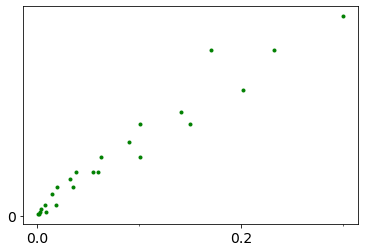

In [222]:
strain_prediction_cy=cof_load_cy**0.1*cof_e_cy*0.9
plt.rcParams.update({'font.size': 14})
#########################
fig6,(ax5d)=plt.subplots()
# breakage of particle 
ax5d.plot(strain_prediction_cy,cof_strain_cy,color='green', marker="o", linestyle='-',linewidth=0, markersize=3, label='Erod 100')
ax5d.xaxis.set_major_locator(MultipleLocator(0.2))
ax5d.xaxis.set_minor_locator(MultipleLocator(0.1))
ax5d.yaxis.set_major_locator(MultipleLocator(8))
ax5d.yaxis.set_minor_locator(MultipleLocator(4))
# plt.savefig('br vs strain.png', dpi=300, bbox_inches='tight')
plt.show()

# gekko moldel 
## import/data setting 


In [204]:
from gekko import GEKKO
e_in=np.concatenate([np.ones(len(e_cum_100[0:-1]))*e_cum_100[0],np.ones(len(e_cum_200[0:-1]))*e_cum_200[0],np.ones(len(e_cum_500[0:-1]))*e_cum_500[0]])#e for collopse (after loading )
L_in=np.concatenate([np.ones(len(e_cum_100[0:-1]))*100,np.ones(len(e_cum_200[0:-1]))*200,np.ones(len(e_cum_500[0:-1]))*500])/1000
L_cy=np.concatenate([np.ones(len(e_cum_100[0:-1]))*100,np.ones(len(e_cum_200[0:-1]))*200,np.ones(len(e_cum_500[0:-1]))*500])/1000
e_cy=np.concatenate([e_cum_100[0:-1]-e_cum_100[0],e_cum_200[0:-1]-e_cum_200[0],e_cum_500[0:-1]-e_cum_500[0]])
s_t_cy=np.concatenate([s_cum_100[1:],s_cum_200[1:],s_cum_500[1:]])

L_in_cy=np.concatenate([np.ones(len(e_cum_100[0:-1]))*100],[np.ones(len(e_cum_200[0:-1]))*200],[np.ones(len(e_cum_500[0:-1]))*500])
e_cy=np.concatenate([e_cum_100[0:-1]-e_cum_100[0],e_cum_200[0:-1]-e_cum_200[0],e_cum_500[0:-1]-e_cum_500[0]])
s_t_cy=np.concatenate([s_cum_100[1:],s_cum_200[1:],s_cum_500[1:]])

## define the variable 

In [228]:
cof_load=np.concatenate([np.ones(len(t1_100[:-1]))*100,np.ones(len(t1_200[:-1]))*200,np.ones(len(t1_500[:-1]))*500])
cof_e=np.concatenate([t1_100[:-1],t1_200[:-1],t1_500[:-1]])
cof_strain=np.concatenate([s1_100[:],s1_200[:], s1_500[:]])


cof_e_in=np.zeros(len(cof_e))
cof_e_in[0]=e_in[0]
cof_e_in[9]=e_in[9]


In [229]:
cof_e

array([0.3029756, 0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576,
       0.0049496, 0.0017216, 0.0006456, 0.38878  , 0.151716 , 0.097916 ,
       0.065636 , 0.038736 , 0.022596 , 0.011836 , 0.00538  , 0.001076 ,
       0.498536 , 0.178616 , 0.120512 , 0.083928 , 0.0538   , 0.03228  ,
       0.019368 , 0.008608 , 0.002152 ])

In [230]:
xm1 = np.array(cof_e) # cumulative voids after the collapse not last one minus the collapse voids
xm2 = np.array(L_cy)  # load commmon
xm3 = np.array(e_in) # collapase voids
xm4= np.array(L_in) 
 
ym = np.array(s_t_cy)

xm1

# only cycle predition

In [231]:
cof_load_cy=np.concatenate([np.ones(len(t1_100[1:-1]))*100,np.ones(len(t1_200[1:-1]))*200,np.ones(len(t1_500[1:-1]))*500])
index = [0, 9,18]
cof_e_in=[e_cum_100[0],e_cum_200[0],e_cum_500[0]]
cof_load_in=[100,200,500]
cof_strain_in=[s_t_cy[0],s_t_cy[9],s_t_cy[18]]
cof_e_cy = np.delete(cof_e, index)
cof_strain_cy=np.delete(cof_strain,index)

In [232]:
cof_e_cy,cof_load_cy,cof_strain_cy

(array([0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576, 0.0049496,
        0.0017216, 0.0006456, 0.151716 , 0.097916 , 0.065636 , 0.038736 ,
        0.022596 , 0.011836 , 0.00538  , 0.001076 , 0.178616 , 0.120512 ,
        0.083928 , 0.0538   , 0.03228  , 0.019368 , 0.008608 , 0.002152 ]),
 array([100., 100., 100., 100., 100., 100., 100., 100., 200., 200., 200.,
        200., 200., 200., 200., 200., 500., 500., 500., 500., 500., 500.,
        500., 500.]),
 array([2.25, 1.25, 0.8 , 0.6 , 0.4 , 0.15, 0.05, 0.03, 2.5 , 1.5 , 1.25,
        0.75, 0.5 , 0.3 , 0.2 , 0.05, 2.7 , 1.7 , 1.4 , 1.  , 0.6 , 0.5 ,
        0.3 , 0.1 ]))

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  7
   Intermediates:  0
   Connections  :  0
   Equations    :  2
   Residuals    :  2
 
 Number of state variables:    27
 Number of total equations: -  24
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    3
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  5.46661E+04  1.40672E-01
    1  9.05687E+05  5.55112E-17
    2  9.75944E+04  1.21055E-01
    3  1.92149E+02  2.45029E-01
    4  1.16615E+01  3.77011E-04
    5  1.14808E+01  2.80725E-05
    6  1.11360E+01  6.09387E-04
    7  1.10320E+01

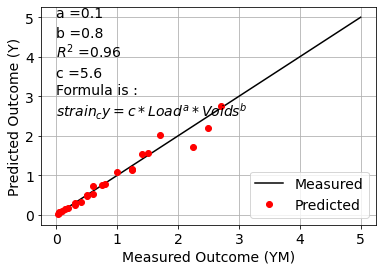

In [233]:
xm1 = np.array(cof_load_cy) # cumulative voids after the collapse not last one minus the collapse voids
xm2 = np.array(cof_e_cy)
ym3 = np.array(cof_strain_cy)

m3 = GEKKO(remote=False)

a = m3.FV(lb=0.1,ub=100.0)
b = m3.FV(lb=0.1,ub=100.0)
c = m3.FV(lb=0.1,ub=100.0)


x1 = m3.Param(value=xm1)
x2 = m3.Param(value=xm2)

z3 = m3.Param(value=ym3)
y3 = m3.Var()
m3.Equation(y3==c*(x1**a)*(x2**b))
m3.Minimize(((y3-z3)/z3)**2)
# Options

a.STATUS = 1
b.STATUS = 1
c.STATUS = 1


m3.options.IMODE = 2
m3.options.SOLVER = 1
# Solve
m3.solve(disp=True)

print('a: ', a.value[0])
print('b: ', b.value[0])
print('c: ', c.value[0])


# print('A: ', A.value[0])

##################################################################################################
cFormula = "Formula is : " + "\n" + \
r"$strain_cy=c* Load^a* Voids^b $"

from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(ym3,y3)

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
# print(cR2)

# plot solution
plt.figure(1)
plt.plot([0,5],[0,5],'k-',label='Measured')
plt.plot(ym3,y3,'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

plt.text(0,5,'a =' + "{:.1f}".format(a.value[0])) 
plt.text(0,3.5,'c =' + "{:.1f}".format(c.value[0])) 
plt.text(0,4.5,'b =' + "{:.1f}".format(b.value[0])) 


plt.text(0,4,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
plt.text(0,2.5,cFormula)
plt.grid(True)
plt.show()

cy_pre=y3

In [796]:
cof_load_in,cof_e_in,cof_strain_in

([100, 500], [0.3029756, 0.498536], [8.0, 17.0])

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  6
   Intermediates:  0
   Connections  :  0
   Equations    :  2
   Residuals    :  2
 
 Number of state variables:    5
 Number of total equations: -  3
 Number of slack variables: -  0
 ---------------------------------------
 Degrees of freedom       :    2
 
 ----------------------------------------------
 Model Parameter Estimation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  3.96404E+00  2.17058E-01
    1  2.11735E+00  2.36262E-01
    2  8.49222E-02  9.06608E-02
    3  4.67605E-01  1.39474E-01
    4  1.49773E-01  7.56788E-02
    5  4.51485E-03  2.94795E-03
    6  1.43517E-03  4.26114E-03
    7  1.45721E-03  

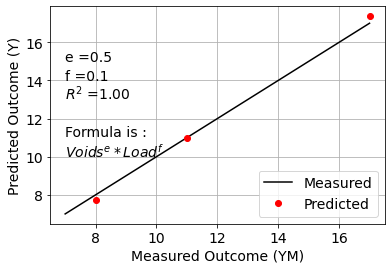

In [234]:
xm1 = np.array(cof_load_in) # cumulative voids after the collapse not last one minus the collapse voids
xm2 = np.array(cof_e_in)
ym4 = np.array(cof_strain_in)

m4 = GEKKO(remote=False)

e = m4.FV(lb=0.1,ub=100.0)
f = m4.FV(lb=0.1,ub=100.0)
# c = m3.FV(lb=0.1,ub=100.0)


x1 = m4.Param(value=xm1)
x2 = m4.Param(value=xm2)

z4 = m4.Param(value=ym4)
y4 = m4.Var()
m4.Equation(y4==(x1**e)*(x2**f))
m4.Minimize(((y4-z4)/z4)**2)
# Options

e.STATUS = 1
f.STATUS = 1
# c.STATUS = 1


m4.options.IMODE = 2
m4.options.SOLVER = 1
# Solve
m4.solve(disp=True)

print('e: ', e.value[0])
print('f: ', f.value[0])
# print('c: ', c.value[0])


# print('A: ', A.value[0])

##################################################################################################
cFormula = cFormula = "Formula is : " + "\n" + \
r"$ Voids^e * Load^f  $"
from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(ym4,y4)

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.plot([7,17],[7,17],'k-',label='Measured')
plt.plot(ym4,y4,'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

plt.text(7,15,'e =' + "{:.1f}".format(e.value[0])) 
plt.text(7,14,'f =' + "{:.1f}".format(f.value[0])) 
# plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(7,13,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
plt.text(7,10,cFormula)
plt.grid(True)
plt.show()


In [798]:
pre_100=cy_pre[0:8]

pre_500=cy_pre[8:16]
pre_100.insert(0,y4[0])

pre_500.insert(0,y4[1])


In [799]:
pre_100

[7.7502430102,
 1.6883557699,
 1.1246466978,
 0.77434976449,
 0.52443557563,
 0.31166446288,
 0.14233328706,
 0.062599671132,
 0.029190940255]

In [800]:
s_cum_100[1:]


array([ 8.  , 10.25, 11.5 , 12.3 , 12.9 , 13.3 , 13.45, 13.5 , 13.53])

In [801]:
zzz

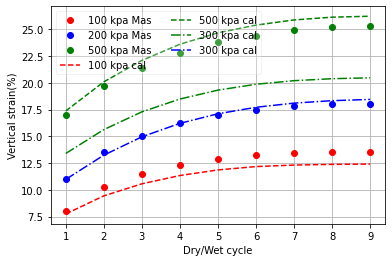

R^2 correlation = 0.9970948696461154


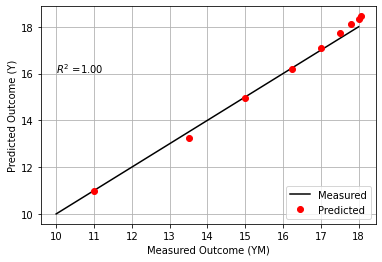

'$D * Voids^E * Load^f + G$'

In [814]:
plt.figure()

plt.plot(np.linspace(1, 9,9),s_cum_100[1:],'ro',label='100 kpa Mas')
plt.plot(np.linspace(1, 9,9),s_cum_200[1:],'bo',label='200 kpa Mas')
plt.plot(np.linspace(1, 9,9),s_cum_500[1:],'go',label='500 kpa Mas')
plt.plot(np.linspace(1, 9,9),np.cumsum(pre_100),'r--',label='100 kpa cal')
#plt.plot(np.linspace(1, 9,9),np.cumsum(pre_200),'b--',label='200 kpa cal')
plt.plot(np.linspace(1, 9,9),np.cumsum(pre_500),'g--',label='500 kpa cal')
plt.plot(np.linspace(1, 9,9),pre_strain(in_e_300,nc_e_300, 9, 300),'g-.',label='300 kpa cal')
plt.plot(np.linspace(1, 9,9),pre_strain(in_e_200,nc_e_200, 9, 200),'b-.',label='300 kpa cal')
pre_strain(in_e_300,nc_e_300, 9, 300)
plt.xlabel('Dry/Wet cycle')
plt.ylabel('Vertical strain(%)')
plt.legend(loc='best',framealpha=0.25,ncol=2)

plt.grid(True)
plt.show()

from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200))

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.plot([10,18],[10,18],'k-',label='Measured')
plt.plot(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200),'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

# plt.text(0,5,'e =' + "{:.2f}".format(e.value[0])) 
# plt.text(0,4,'f =' + "{:.2f}".format(f.value[0])) 
# plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(10,16,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
# plt.text(0,1,cFormula)
plt.grid(True)
plt.show()
# cFormula = "Formula is : " + "\n" + \
r"$D * Voids^E * Load^f + G$"

# prediction of 300 kpa

In [803]:
(s_cum_200[1:]),np.array(pre_strain(in_e_200,nc_e_200, 9, 200)),r_value

(array([11.  , 13.5 , 15.  , 16.25, 17.  , 17.5 , 17.8 , 18.  , 18.05]),
 array([10.84887616, 12.68104163, 14.02953142, 14.98600839, 15.63247448,
        16.04144038, 16.27609661, 16.39047884, 16.42957445]),
 0.9996482290000339)

R^2 correlation = 0.9970948696461154


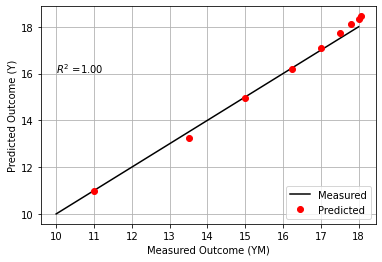

'$D * Voids^E * Load^f + G$'

In [812]:
from scipy import stats
slope, intercept, r_value, p_value, \
       std_err = stats.linregress(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200))

r2 = r_value**2
cR2 = "R^2 correlation = " + str(r_value**2)
print(cR2)

# plot solution
plt.figure(1)
plt.plot([10,18],[10,18],'k-',label='Measured')
plt.plot(s_cum_200[1:],pre_strain(in_e_200,nc_e_200, 9, 200),'ro',label='Predicted')
plt.xlabel('Measured Outcome (YM)')
plt.ylabel('Predicted Outcome (Y)')
plt.legend(loc='lower right')

# plt.text(0,5,'e =' + "{:.2f}".format(e.value[0])) 
# plt.text(0,4,'f =' + "{:.2f}".format(f.value[0])) 
# plt.text(0,2,'c =' + "{:.2f}".format(c.value[0])) 



plt.text(10,16,r'$R^2$ =' + "{:.2f}".format(r_value**2)) 
# plt.text(0,1,cFormula)
plt.grid(True)
plt.show()
# cFormula = "Formula is : " + "\n" + \
r"$D * Voids^E * Load^f + G$"

In [805]:
df3=pd.read_excel(r"C:\Users\user\Desktop\python link\voids vs load.xlsx")
in_e_300=np.interp(300,df3["loading"],df3["voids-load"])
nc_e_300=np.interp(300,[200,500],[t0_200[-1],t0_500[-1]])
no_cycle=9
load=300

In [809]:
in_e_200=np.interp(200,df3["loading"],df3["voids-load"])
nc_e_200=0.7162
no_cycle=9
load=200

In [810]:
nc_e_200,t0_200[-1]

(0.7162, 0.7162200000000002)

In [811]:
def pre_strain (in_e,nc_e,no_cycle,load):
    strain_pre=[]
    
    # initial strain
    str_in=load**0.47*(in_e-nc_e)**0.1
    strain_pre.insert(0,str_in)
    ini1=[]
    ini=in_e*(1-((str_in)/100))-(str_in)/100
    for i in range(8):
        strain_pre.append(strain_pre[i]+5.61*load**0.1*(ini-nc_e)**0.78)
        ini=in_e*(1-((strain_pre[i+1])/100))-(strain_pre[i+1])/100
        ini1.append(in_e*(1-(strain_pre[i+1])/97)-(strain_pre[i+1])/97)
    return strain_pre
        
        
    


In [786]:
ym3,y3,stats.linregress(ym3,y3)

(array([2.25, 1.25, 0.8 , 0.6 , 0.4 , 0.15, 0.05, 0.03, 2.7 , 1.7 , 1.4 ,
        1.  , 0.6 , 0.5 , 0.3 , 0.1 ]),
 [1.6883557699, 1.1246466978, 0.77434976449, 0.52443557563, 0.31166446288, 0.14233328706, 0.062599671132, 0.029190940255, 2.7197599348, 2.0026731602, 1.5114627805, 1.0695045995, 0.71882941625, 0.48313558435, 0.2571206315, 0.087467539269],
 LinregressResult(slope=0.958667657331956, intercept=0.015572257163440573, rvalue=0.975791575777818, pvalue=1.2256585132307972e-10, stderr=0.05742497553052748, intercept_stderr=0.06681578515358402))

In [710]:
pre_strain(in_e_300,nc_e_300, 9, 300),cof_e_cy

(([12.949659690320999,
   15.33076490303518,
   17.10873745145729,
   18.393145502322977,
   19.28246599843613,
   19.864276398135647,
   20.215449196827823,
   20.40234522038525,
   20.48098415573127],
  array([ 0.09735243,  0.05928352,  0.03178253,  0.01274092,  0.00028354,
         -0.00723557, -0.01123728, -0.01292105])),
 array([0.1190056, 0.0705856, 0.0436856, 0.0264696, 0.0135576, 0.0049496,
        0.0017216, 0.0006456, 0.151716 , 0.097916 , 0.065636 , 0.038736 ,
        0.022596 , 0.011836 , 0.00538  , 0.001076 , 0.178616 , 0.120512 ,
        0.083928 , 0.0538   , 0.03228  , 0.019368 , 0.008608 , 0.002152 ]))

In [757]:
pre_strain(in_e_200,nc_e_200, 9, 200)

[9.550003401525537,
 11.39681583861104,
 12.76429824238251,
 13.741724572258477,
 14.409114288919849,
 14.837393893532422,
 15.088560265145636,
 15.215840743071917,
 15.263817474909589]

In [921]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(pre_strain(in_e_200,nc_e_200, 9, 200),s_cum_200[1:]) 

In [922]:
coefficient_of_dermination

0.9908735083555548